In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import os

In [2]:
# from zipfile import ZipFile 
  
# # loading the temp.zip and creating a zip object 
# with ZipFile("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Object Localisation and Detection -1\\PistolData_merged.zip", 'r') as zObject: 
  
#     # Extracting all the members of the zip  
#     # into a specific location. 
#     zObject.extractall( 
#         path="C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Object Localisation and Detection -1\\") 
# zObject.close() 

In [3]:
main_file_path = "C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Object Localisation and Detection -1\\PistolData_merged"

In [4]:
os.listdir(main_file_path) 

['.DS_Store', 'pistol_annotations', 'pistol_images']

In [5]:
annot = len(os.listdir(main_file_path + "\\" + "pistol_annotations")) 
print(f'pistol_annotations : {annot}')

pistol_annotations : 3703


In [6]:
images = os.listdir(main_file_path + "\\" + "pistol_images") 
print(f'pistol_annotations : {annot}')

pistol_annotations : 3703


In [7]:
for val in range(10):
    test_file = main_file_path + "\\"+"pistol_annotations"+"\\"+os.listdir(main_file_path + "\\" + "pistol_annotations")[val]
    with open (test_file,'r') as f:
        print(f.readlines())


['1 0.4253846153846154 0.2447973713033954 0.22153846153846152 0.2814895947426068']
['1 0.4983922829581993 0.4907407407407407 0.3665594855305466 0.4506172839506173']
['1 0.6466602129719264 0.28387096774193543 0.08131655372700872 0.05935483870967742']
['1 0.5747967479674796 0.39390243902439026 0.27804878048780485 0.3341463414634146']
['1 0.5061538461538462 0.4229559748427673 0.3353846153846154 0.3050314465408805']
['1 0.4972727272727273 0.41226993865030676 0.9709090909090908 0.792638036809816']
['1 0.6112716763005781 0.3324074074074074 0.33815028901734107 0.2462962962962963']
['1 0.5499999999999999 0.4414414414414415 0.492 0.6426426426426427']
['1 0.5545454545454546 0.6404545454545455 0.8181818181818182 0.7172727272727273']
['1 0.49166666666666664 0.3745387453874539 0.9000000000000001 0.6826568265682658']


[1.0, 0.4253846153846154, 0.2447973713033954, 0.22153846153846152, 0.2814895947426068]
ImgResolution (416, 416, 3)
[1.0, 0.5188888888888888, 0.6283333333333333, 0.22, 0.27]
ImgResolution (416, 416, 3)
[1.0, 0.5672727272727273, 0.27322404371584696, 0.4290909090909091, 0.5027322404371584]
ImgResolution (416, 416, 3)
[1.0, 0.6140684410646388, 0.23177083333333331, 0.49809885931558934, 0.2864583333333333]
ImgResolution (416, 416, 3)
[1.0, 0.6994535519125683, 0.37999999999999995, 0.07650273224043716, 0.23636363636363636]
ImgResolution (416, 416, 3)


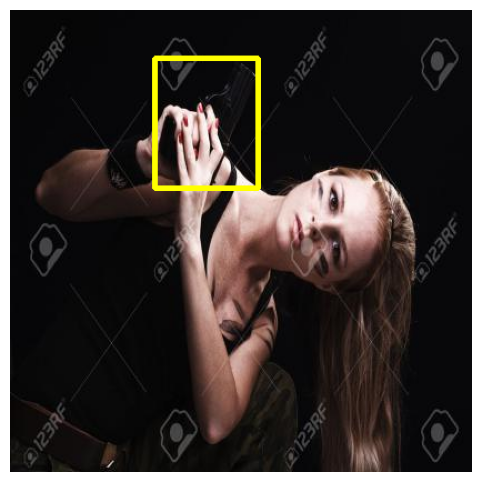

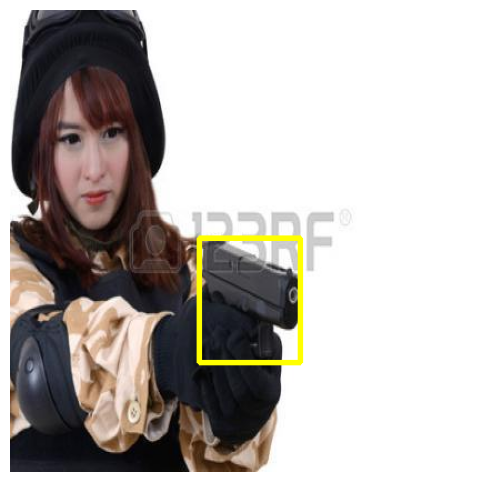

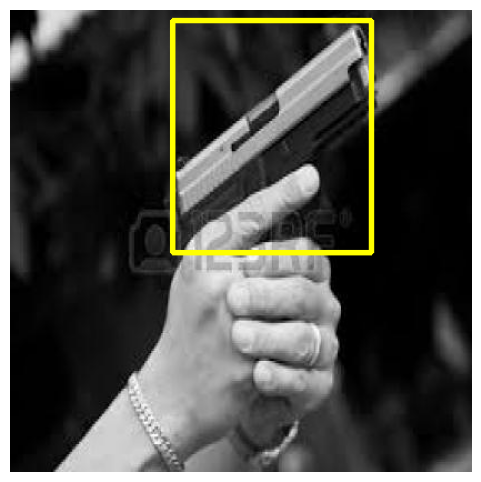

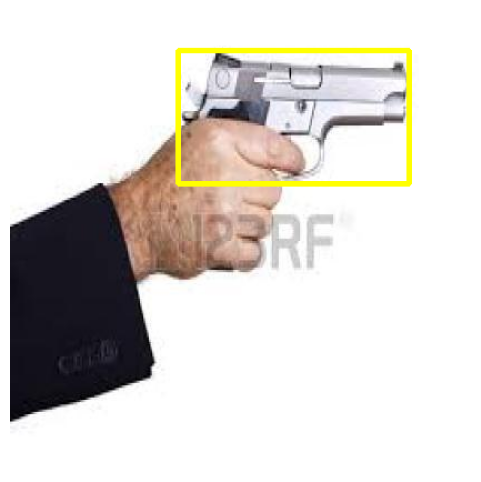

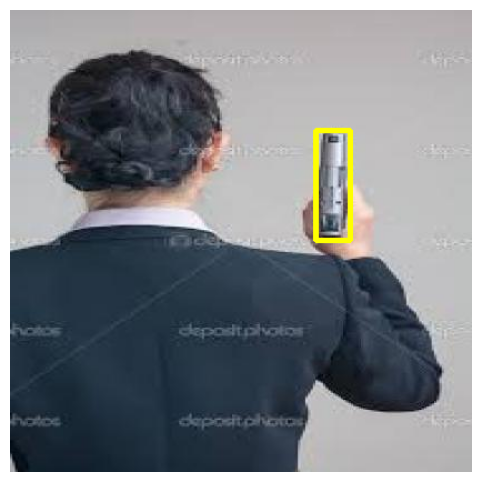

In [8]:
import matplotlib.pyplot as plt
import cv2


img_h = 416
img_w = 416

def cv_coords(box):
  '''
  This function will convert B.B cordinates from (X_center,Y_center,width,height) format
  to (x_start,y_start,x_end,y_end) required for cv2 to annotate rectangle on objects
  '''
  x,y,w,h= box[1],box[2],box[3],box[4]
  x1, y1 = int((x-w/2)*img_w), int((y-h/2)*img_h)
  x2, y2 = int((x+w/2)*img_w), int((y+h/2)*img_h)
  return x1, y1, x2, y2

def plot_img_and_box(img, bbox):
  plt.figure(figsize=(6,6))
  print("ImgResolution",img.shape)
  bbox = cv_coords(bbox)
  start_point = (bbox[0],bbox[1])
  end_point = (bbox[2],bbox[3])
  img = np.copy(img)
  img = cv2.rectangle(img,start_point,end_point,(255,255,0), 3)
  plt.axis('off')
  plt.imshow(img)

for i in range(5):
    img_path = f'PistolData_merged\\pistol_images\\{i+1}.jpg'
    label_path = f'PistolData_merged\\pistol_annotations\\{i+1}.txt'
    img = plt.imread(img_path)

    img = plt.imread(img_path)
    with open(label_path,'r') as f:
       bbox = (f.readlines())
       bbox = [float(element) for element in bbox[0].split(" ")]
       print(bbox)
    plot_img_and_box(img, bbox)

In [9]:
path  ="PistolData_merged\pistol_annotations"
annot_files = os.listdir(path)


In [10]:
def get_bbox(label_path):
    with open(label_path,'r') as f:
        bbox = f.readlines()
        bbox = [float(element) for element in bbox[0].split(" ")]
        return bbox[0],bbox[1:]

def return_image_label(filename):
    try:
        img_path = f'PistolData_merged\\pistol_images\\{filename}.jpg'
        image = plt.imread(img_path)
        label_path = f'PistolData_merged\\pistol_annotations\\{filename}.txt'
        class_label,bbox_label = get_bbox(label_path)
        return True,image,class_label,bbox_label
    except Exception as e:
        print("Exception:",filename,str(e))
        return False,None,None,None
    
images, class_labels,bbox_labels = [],[],[]

for filename in annot_files:
    file_name = filename[:-4]
    status,image,class_label,bbox_label = return_image_label(file_name)
    if(status == True and image.shape == (416,416,3)):
        images.append(image)
        class_labels.append(class_label)
        bbox_labels.append(bbox_label)


images,class_labels,bbox_labels = np.array(images),np.array(class_labels),np.array(bbox_labels)






In [11]:
print(images.shape,class_labels.shape,bbox_labels.shape)

(3703, 416, 416, 3) (3703,) (3703, 4)


In [12]:
class_labels

array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
bbox_labels

array([[0.42538462, 0.24479737, 0.22153846, 0.28148959],
       [0.49839228, 0.49074074, 0.36655949, 0.45061728],
       [0.64666021, 0.28387097, 0.08131655, 0.05935484],
       ...,
       [0.66423077, 0.51078799, 0.45153846, 0.815197  ],
       [0.49666667, 0.49450549, 0.92666667, 0.79120879],
       [0.48653846, 0.45345188, 0.97153846, 0.90481172]])

In [14]:
np.unique(class_labels,return_counts=True)

(array([0., 1.]), array([ 999, 2704], dtype=int64))

In [24]:
from sklearn.model_selection import train_test_split as tts 
xtrain,xtest,ytrain,ytest,ytrain_box,ytest_box = tts(images,class_labels,bbox_labels,test_size=0.5,random_state=42)

In [25]:
xtrain.shape , ytrain_box.shape , xtest.shape , ytest_box.shape ,ytest.shape

((1851, 416, 416, 3), (1851, 4), (1852, 416, 416, 3), (1852, 4), (1852,))

In [26]:
Resnet101 = tf.keras.applications.ResNet101(weights='imagenet',include_top=False,
                                            input_tensor=tf.keras.layers.Input(shape=(416,416,3)))


In [27]:
Resnet101.trainable = False

In [28]:
res_output = Resnet101.output

flat = tf.keras.layers.Flatten()(res_output)

#classification head
x = tf.keras.layers.Dense(128,activation='relu')(flat)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)

class_out = tf.keras.layers.Dense(1,activation='sigmoid',name='class_output')(x)

# Regression head

x = tf.keras.layers.Dense(128,activation='relu')(flat)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)

reg_out = tf.keras.layers.Dense(4,activation='sigmoid',name='box_output')(x)

model = tf.keras.models.Model(Resnet101.input,[reg_out,class_out])



In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 422, 422, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 208, 208, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [30]:
losses = {'class_output' : 'binary_crossentropy',
'box_output' : 'mean_squared_error'}

loss_weights = {'class_output' : 1.0, 'box_output' : 4.0}

metrics = {'class_output' : 'accuracy', 'box_output' :'mse'}

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,metrics=metrics,loss_weights=loss_weights)

In [34]:
hist = model.fit(x=xtrain,y = {"class_output":ytrain,"box_output":ytrain_box},
                 validation_data=(xtest,{"class_output":ytest,"box_output":ytest_box}),
                 batch_size=64,
                 epochs=10
                 )

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [33]:
import gc
# Place this statement inside your loop
gc.collect()


34558